<a href="https://colab.research.google.com/github/SaharaSheik/Machine-Learning---Classification-/blob/main/Sheikholeslami_Sahar_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This jupyter notebook is prepared by “Sahar Sheikholeslami”.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Load Data and perform basic EDA 

### I. import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from sklearn import tree, ensemble, linear_model

### II.  import the data to a dataframe and show the count of rows and columns (1 pt)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hrdata2.csv")

In [ ]:
df.shape

(8955, 15)

### III. Show the top 5 and last 5 rows (1 pt)

In [ ]:
df.head(5)

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0


In [ ]:
df.tail(5)

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1.0,100-500,Pvt Ltd,1,52,1.0
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9.0,50-99,Pvt Ltd,1,36,1.0
8952,19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10.0,100-500,Public Sector,3,23,0.0
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7.0,10/49,Funded Startup,1,25,0.0
8954,19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,4,44,0.0


### IV. Show how many columns have null values

#### here seens to be no missing data. I included a few strategies here to show that there are no missing datas. Incase the question refers to us demonstrating differnt ways of analyzing missing data

In [ ]:
df.isnull().sum().sort_values(ascending = False)

Unnamed: 0                0
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
nulls = df.isnull().sum()
nulls = nulls.to_frame("nulls").sort_values("nulls", ascending = False)
print(nulls)

                        nulls
Unnamed: 0                  0
enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                  0
company_size                0
company_type                0
last_new_job                0
training_hours              0
target                      0


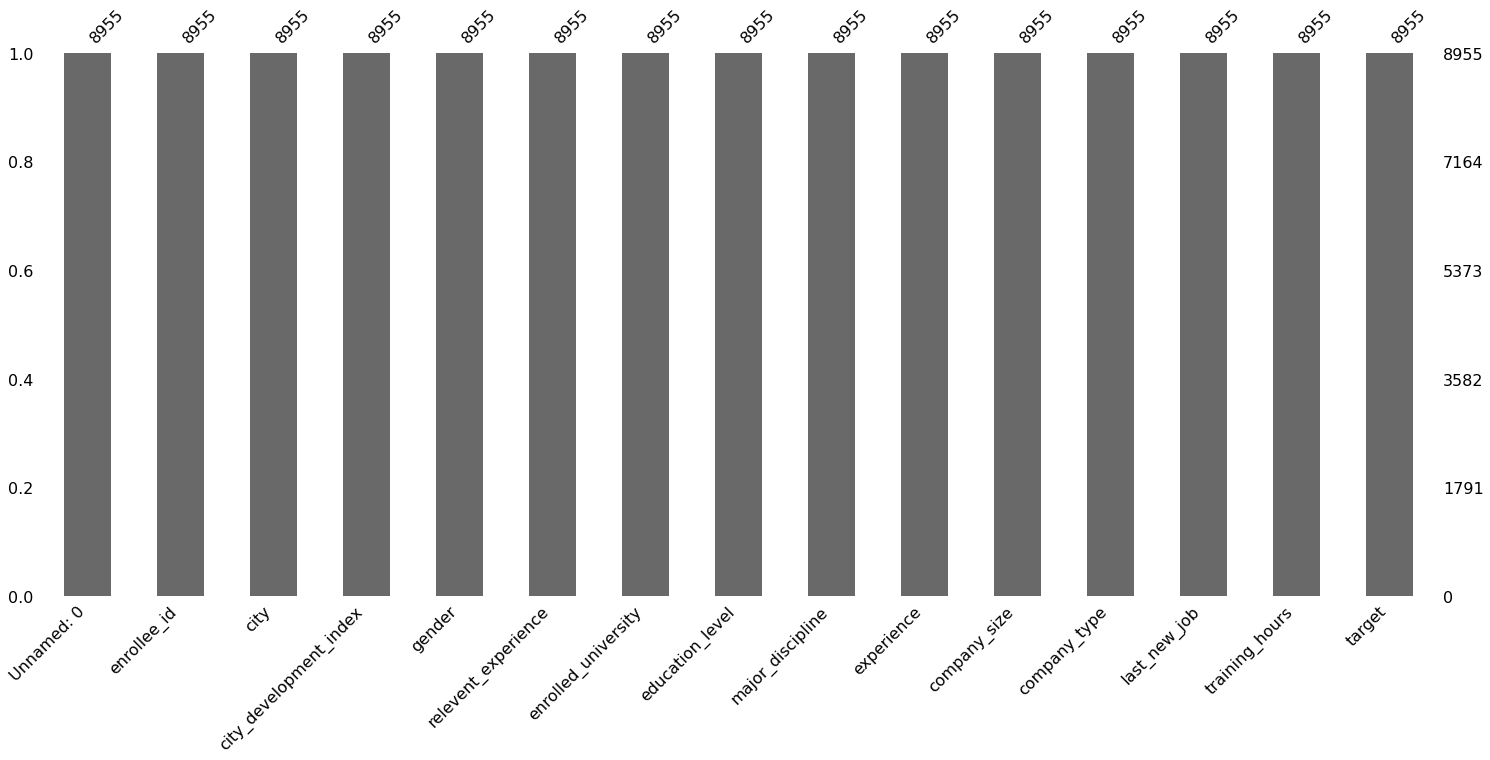

In [ ]:
msno.bar(df)

###  V. Plot the count of target and discuss its imbalances and probably issues and solutions 

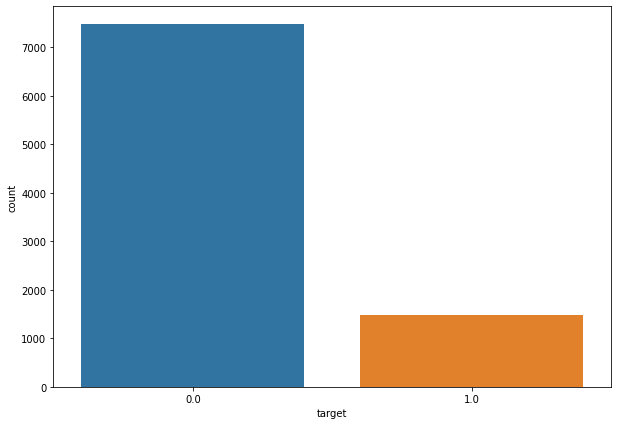

In [ ]:
plt.figure(figsize = (10,7))
ax = sns.countplot(x="target", data=df)

#### the count of target 1 vs target 2 is severly imbalanced.  when building a model this can create an imbalance in out training data.  where most of the data will have a target 0 put then the moddle will struggle with predicting the target 1.  So the model may have a high accuracy since most data has a target 0 anyways but it will struggle with precision and recall rates.  Possible solutions to combat data imbalance would be:

#### 1) Stratified Sampling The dataset is grouped by target variable (0 and 1) and then from each group we will pick a percentain (called strata).  In this way we will be able to maintain a constant level for the frequency of each occurance of target.  So for example if in our data is 90% 0 and 10% 1, the samples made up of 90% zero and 10% one as well.
#### 2) Under-Sampling: we create a sample that both targer 1 and 0 are equally represented.  We group our data by target 1 and 0 and pick x number from each group. X is the number instances in the targer 1 (which is the smaller data)
#### 3) Over-Sampling. Creates a sample where all groups are equally represented by genetrating synteric data of the manority group in this case targer = 1(SMOTE, Synthetic Minority Oversampling Technique)



## 2. Feature Selection and Pre-processing 

### I. Preprocessing City:

#### I. Plot #of records per city so that the highest city counts are shown in descending order

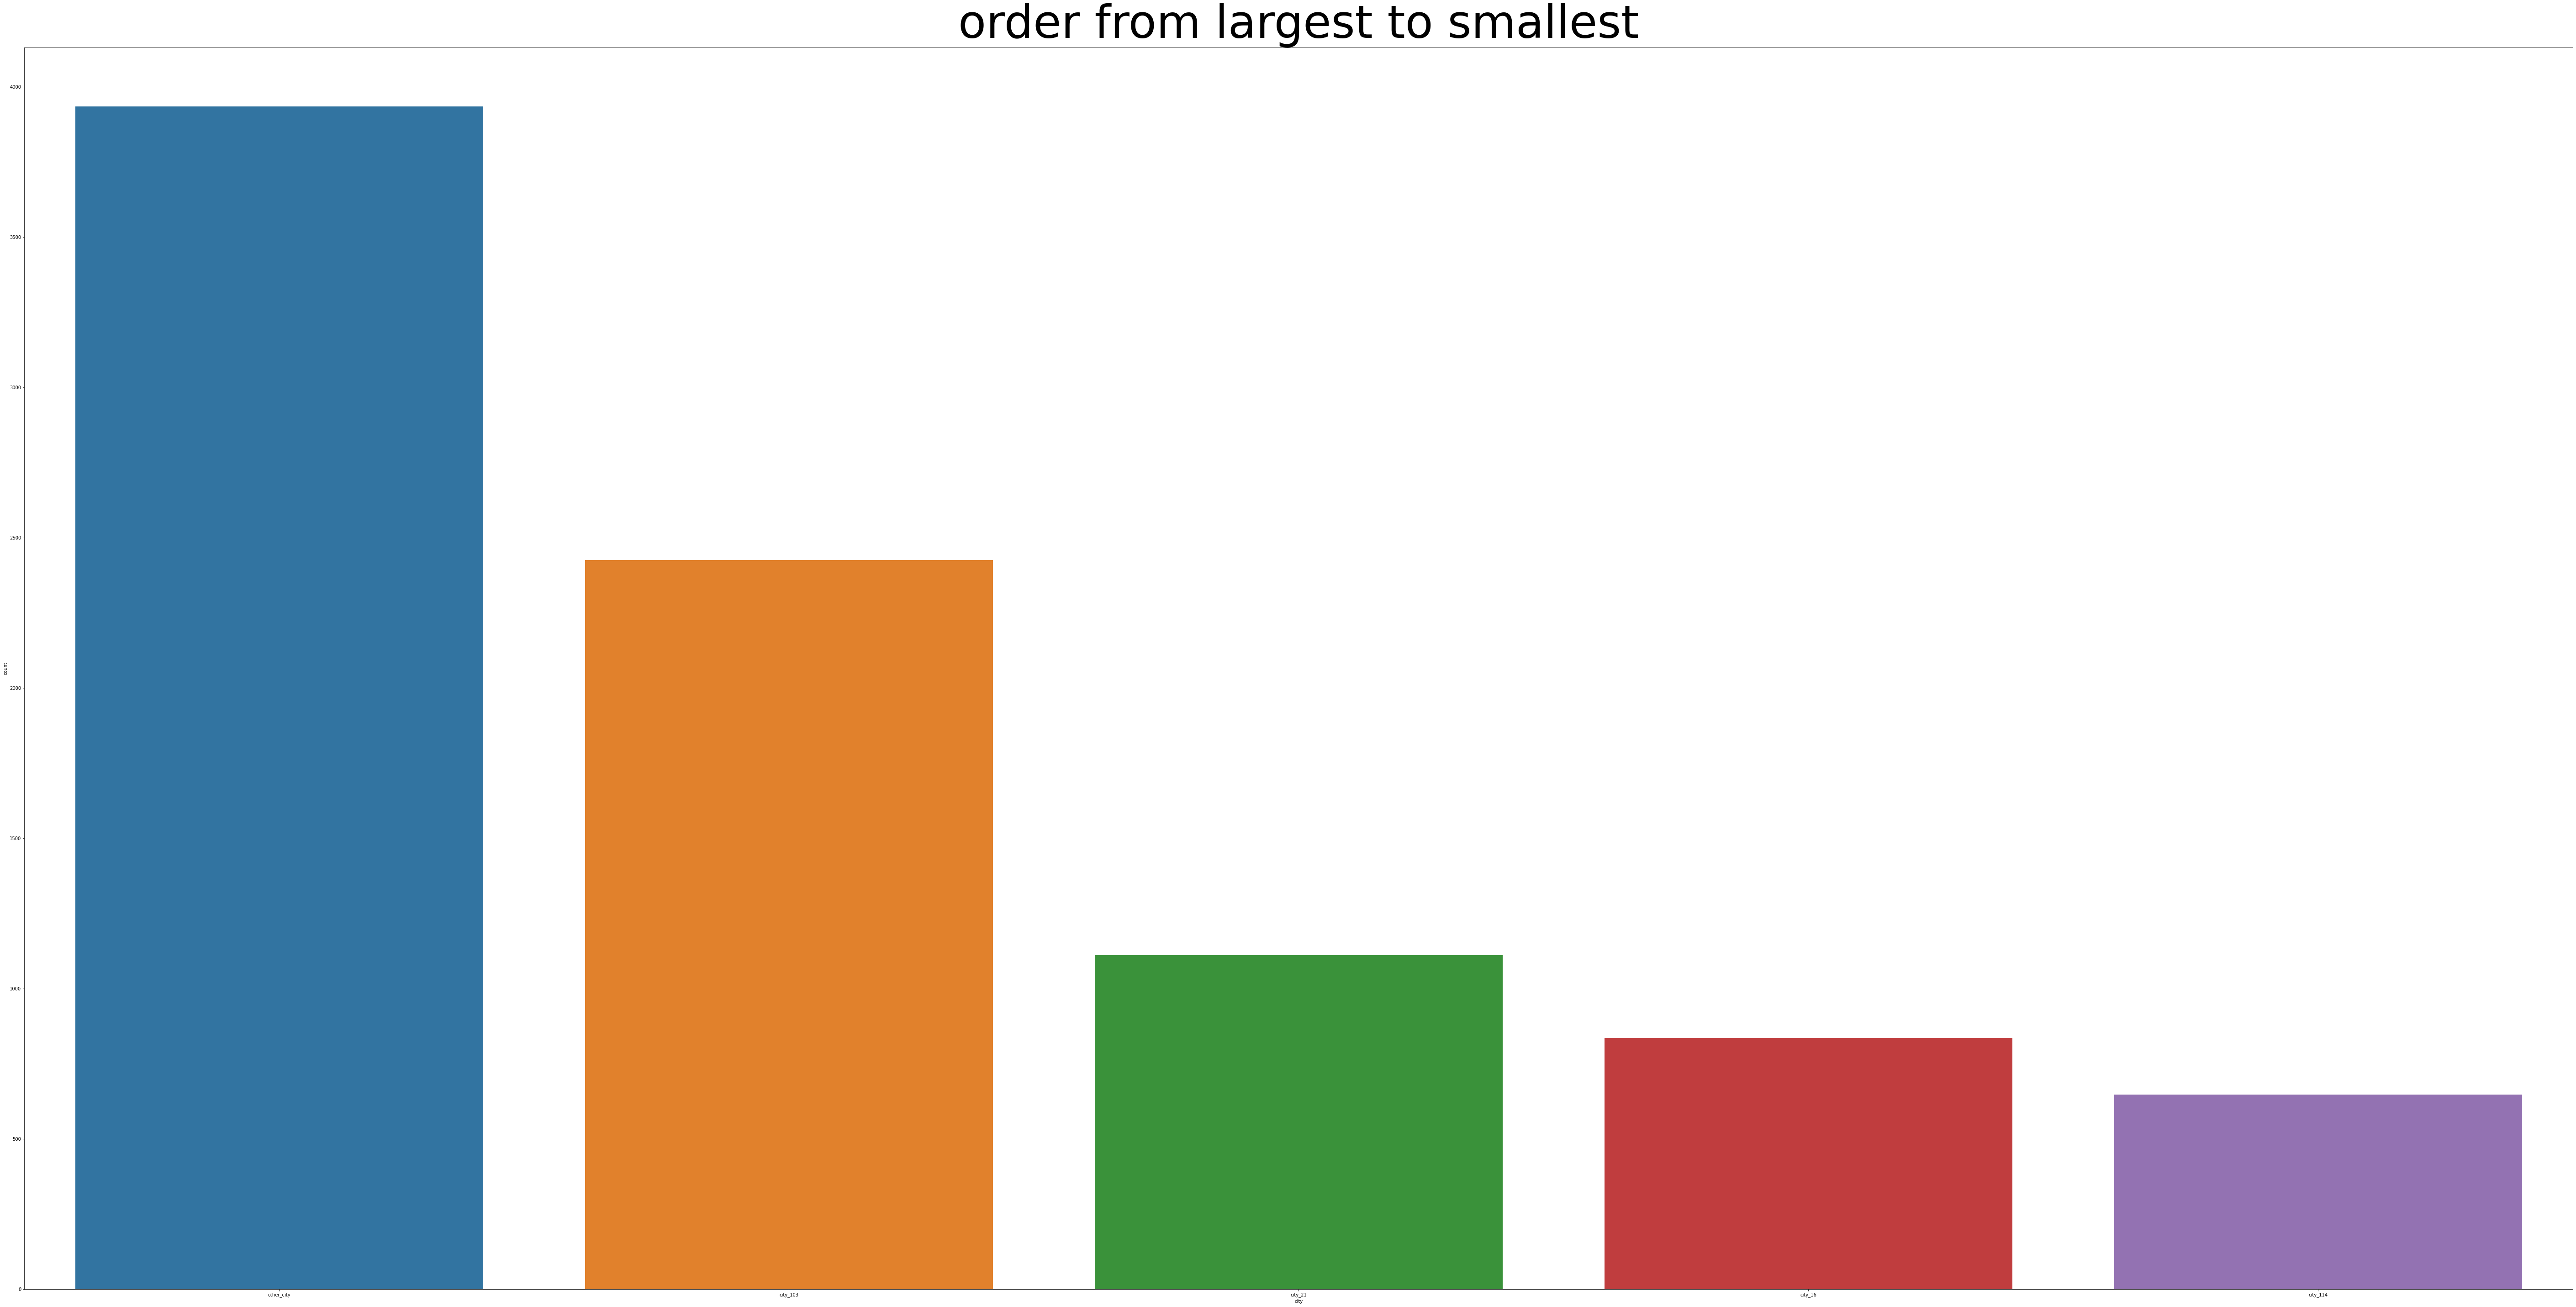

In [ ]:
large_to_small = df.groupby('city').size().sort_values().index[::-1]
plt.figure(figsize=(100,50))

plt.title('order from largest to smallest', fontsize=100)

sns.countplot(x='city', data=df, order=large_to_small)





#### II. How many rows belong to the count-wise top 4 cities in total and how many for the remaining? (The plot you have generated in 2.i.i should help you to identify those cities)

#### I used the Counter to get the 4 most common eements within city data frame and added them

In [ ]:
from collections import Counter
top4 = Counter(df['city']).most_common(4)
print(top4)



[('other_city', 3934), ('city_103', 2426), ('city_21', 1111), ('city_16', 836)]


In [ ]:
top4_count = 0
top4_cities = []
for c, counter in top4:
    top4_count+=counter
    top4_cities.append(c)

print("total number of rows for top 4 cities is: %d" % top4_count)


total number of rows for top 4 cities is: 8307


In [ ]:
other_rows = df.shape[0]-top4_count
print("total number of other rows is: %d" % other_rows)

total number of other rows is: 3934


#### III. Replace the city name with city_others if the city name is not within the top 4 city names. (This link might help you: https://stackoverflow.com/questions/31128477/how-to-set-values-based-on-a-list-in-pandas-python (Links to an external site.) (Also, converting the list to a set and then doing a set difference might help you as well)

#### first making a set of city names so the dublicats are eliminated and removing the top 4 cities by difference update method


In [ ]:
cityNames = set(df["city"])
cityNames.difference_update(top4_cities)

#### updating the list so all the city names other than top 4 are other city

In [ ]:
df.loc[df['city'].isin(cityNames),'city'] = 'other_city'

#### IV. Show some sample data that the records have changed appropriately

#### I am using counter again to show the top 10 records,  my expectation is that since all the data is only the top 4 and the rest should be other city this action should only show us 5 cities.  With "other city" being the largest.  This number should match the data from question II

In [ ]:
top10 = Counter(df['city']).most_common(10)
print(top10)


[('other_city', 3934), ('city_103', 2426), ('city_21', 1111), ('city_16', 836), ('city_114', 648)]


#### Showing if we sort the data by city in a descending order so other city will be on top the top records will all be other-city since other city is alphabatically after city-number

In [ ]:
df.sort_values(by = 'city', ascending = False).head(50)

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,other_city,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
4781,10138,25201,other_city,0.895,Male,No relevent experience,Full time course,Graduate,STEM,6.0,10/49,Pvt Ltd,2,73,0.0
4798,10162,7538,other_city,0.762,Male,No relevent experience,no_enrollment,Masters,STEM,10.0,5000-9999,Public Sector,1,122,0.0
4797,10161,32986,other_city,0.682,Male,Has relevent experience,no_enrollment,Graduate,STEM,6.0,100-500,Pvt Ltd,1,45,0.0
4796,10160,21640,other_city,0.895,Male,Has relevent experience,no_enrollment,Graduate,STEM,9.0,10/49,Pvt Ltd,1,89,0.0
4794,10157,3272,other_city,0.924,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,100-500,Pvt Ltd,>4,39,0.0
4793,10155,8059,other_city,0.913,Male,Has relevent experience,Part time course,Graduate,STEM,7.0,100-500,Pvt Ltd,1,18,0.0
4791,10148,30247,other_city,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,500-999,Pvt Ltd,>4,10,0.0
4787,10144,7843,other_city,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,10000+,Pvt Ltd,1,54,1.0
4783,10140,5231,other_city,0.899,Male,Has relevent experience,Full time course,Masters,STEM,13.0,500-999,Funded Startup,1,20,0.0


### II. Education Level:

#### I. Show the unique values of education level.

In [ ]:
unique_education = set(df['education_level'])
print(unique_education)

{'Masters', 'Graduate', 'Phd'}


#### II. Replace the value of Education level column like ordinal values, "Graduate" -> 0, Masters->1, and Phd -> 2 (writing a function with the condition and return values and using apply with the data frame can help you to achieve this.)


In [ ]:
## changed the set into a list to preserve its order

list_unique_education = sorted(unique_education)


df['education_level'].replace(list_unique_education, [0, 1, 2], inplace=True)




#### III. Show some sample data that the records have changed appropriately

In [ ]:
pd.set_option('display.max_rows', None)


df.head(100)


,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,other_city,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,other_city,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,other_city,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0
5,12,25619,other_city,0.913,Male,Has relevent experience,no_enrollment,0,STEM,21.0,1000-4999,Pvt Ltd,3,23,0.0
6,15,6588,city_114,0.926,Male,Has relevent experience,no_enrollment,0,STEM,16.0,10/49,Pvt Ltd,>4,18,0.0
7,20,31972,other_city,0.843,Male,Has relevent experience,no_enrollment,1,STEM,11.0,100-500,Pvt Ltd,1,68,0.0
8,21,19061,city_114,0.926,Male,Has relevent experience,no_enrollment,1,STEM,11.0,100-500,Pvt Ltd,2,50,0.0
9,23,7041,other_city,0.776,Male,Has relevent experience,no_enrollment,0,Humanities,0.0,1000-4999,Pvt Ltd,1,65,0.0


### III. company_size column:

#### I. Show the unique values of the company_size column

In [ ]:
u_company_size = set(df['company_size'])
print (u_company_size)

{'100-500', '10/49', '10000+', '<10', '5000-9999', '1000-4999', '500-999', '50-99'}


#### II. Change the values of the company_size column from 0 to 7 where e0 is <10 and 7 is 10000+. The order of the numbers should be based on the values of the column-like an ordinary variable. (writing a function with the condition and return values and using apply with the data frame can help you to achieve this.)

In [ ]:
list_u_company_size = list(u_company_size)
print (list_u_company_size)

['100-500', '10/49', '10000+', '<10', '5000-9999', '1000-4999', '500-999', '50-99']


In [ ]:
df['company_size'].replace(list_u_company_size, [7, 6,3,1,0 ,5,4,2], inplace=True)

#### III. Show the updated unique values

In [ ]:
u_company_size = set(df['company_size'])
print(u_company_size)

{0, 1, 2, 3, 4, 5, 6, 7}


In [ ]:
df.head(100)

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,other_city,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,2,Pvt Ltd,>4,47,0.0
1,4,666,other_city,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,2,Funded Startup,4,8,0.0
2,7,402,other_city,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,1,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,2,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,0,Pvt Ltd,1,108,0.0
5,12,25619,other_city,0.913,Male,Has relevent experience,no_enrollment,0,STEM,21.0,5,Pvt Ltd,3,23,0.0
6,15,6588,city_114,0.926,Male,Has relevent experience,no_enrollment,0,STEM,16.0,6,Pvt Ltd,>4,18,0.0
7,20,31972,other_city,0.843,Male,Has relevent experience,no_enrollment,1,STEM,11.0,7,Pvt Ltd,1,68,0.0
8,21,19061,city_114,0.926,Male,Has relevent experience,no_enrollment,1,STEM,11.0,7,Pvt Ltd,2,50,0.0
9,23,7041,other_city,0.776,Male,Has relevent experience,no_enrollment,0,Humanities,0.0,5,Pvt Ltd,1,65,0.0


### IV. Last_new_job:

#### I. Show the unique values of the last_new_job column

In [ ]:
uniqueJob = set (df["last_new_job"])
list_uniqueJob = list(uniqueJob)

print(list_uniqueJob)


['>4', 'never', '2', '1', '3', '4']


#### II. Convert the values of this column to never->0, 1->1,....>4 -->5

In [ ]:
df['last_new_job'].replace(uniqueJob  , [5, 4, 3, 0, 2, 1], inplace=True)

#### III. Show the updated values

In [ ]:
uniqueJob = set(df ["last_new_job"])
print(uniqueJob)


{0, 1, 2, 3, 4, 5}


In [ ]:
df.head(100)

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,other_city,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,2,Pvt Ltd,5,47,0.0
1,4,666,other_city,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,2,Funded Startup,1,8,0.0
2,7,402,other_city,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,1,Pvt Ltd,5,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,2,Pvt Ltd,0,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,0,Pvt Ltd,0,108,0.0
5,12,25619,other_city,0.913,Male,Has relevent experience,no_enrollment,0,STEM,21.0,5,Pvt Ltd,2,23,0.0
6,15,6588,city_114,0.926,Male,Has relevent experience,no_enrollment,0,STEM,16.0,6,Pvt Ltd,5,18,0.0
7,20,31972,other_city,0.843,Male,Has relevent experience,no_enrollment,1,STEM,11.0,7,Pvt Ltd,0,68,0.0
8,21,19061,city_114,0.926,Male,Has relevent experience,no_enrollment,1,STEM,11.0,7,Pvt Ltd,3,50,0.0
9,23,7041,other_city,0.776,Male,Has relevent experience,no_enrollment,0,Humanities,0.0,5,Pvt Ltd,0,65,0.0


### V. Other columns:

#### I. Show the unique values of company_type, major_descipline, enrolled_university, relevant_experience, gender, and updated city column

In [ ]:
u_company_type = set(df["company_type"])
print("company_type: ", u_company_type)
u_major_discipline = set(df["major_discipline"])
print("major_discipline: ", u_major_discipline)
u_enrolled_university = set(df["enrolled_university"])
print("enrolled_university: ", u_enrolled_university)
u_relevent_experience = set(df["relevent_experience"])
print("relevent_experience: " , u_relevent_experience)
u_gender = set(df["gender"])
print("gender: ", u_gender)
u_city = set(df["city"])
print("city: ", u_city)
other_col = [ 'company_type', 'major_discipline', 'enrolled_university', 'relevent_experience', 'gender', 'city']

company_type:  {'Early Stage Startup', 'Pvt Ltd', 'Public Sector', 'Other', 'Funded Startup', 'NGO'}
major_discipline:  {'Humanities', 'Arts', 'STEM', 'Other', 'No Major', 'Business Degree'}
enrolled_university:  {'Full time course', 'Part time course', 'no_enrollment'}
relevent_experience:  {'Has relevent experience', 'No relevent experience'}
gender:  {'Female', 'Male', 'Other'}
city:  {'other_city', 'city_16', 'city_114', 'city_21', 'city_103'}


#### II. As one-hot encoding is a bit strict, use panda's get_dummies function to create binary columns for the values of the following columns:

In [ ]:
for col in other_col:
    dummy_col = pd.get_dummies(df[col])
    df.reset_index(drop=True, inplace=True)
    dummy_col.reset_index(drop=True, inplace=True)
    df = pd.concat([df, dummy_col],axis = 1 )
    




#### III. Show the top 5 and last 5 rows to show that the table has changed [You must set this first before showing the data frame as many columns will be hidden due to the large number of columns: 

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head(5)


,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other,STEM,Full time course,Part time course,no_enrollment,Has relevent experience,No relevent experience,Female,Male,Other,city_103,city_114,city_16,city_21,other_city
0,1,29725,other_city,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,1,Pvt Ltd,4,47,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1
1,4,666,other_city,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,1,Funded Startup,2,8,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
2,7,402,other_city,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,4,Pvt Ltd,4,18,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,1,Pvt Ltd,3,46,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,0,Pvt Ltd,3,108,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0


In [ ]:
df.tail(5)

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other,STEM,Full time course,Part time course,no_enrollment,Has relevent experience,No relevent experience,Female,Male,Other,city_103,city_114,city_16,city_21,other_city
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,0,STEM,1.0,7,Pvt Ltd,0,52,1.0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,1,STEM,9.0,2,Pvt Ltd,0,36,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0
8952,19150,32313,other_city,0.920,Female,Has relevent experience,no_enrollment,0,STEM,10.0,7,Public Sector,2,23,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,0,Humanities,7.0,6,Funded Startup,0,25,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0
8954,19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,21.0,2,Pvt Ltd,1,44,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0


#### IV. Also, show the shape of the table

In [ ]:
df.shape

(8955, 40)

### VI. Drop the enrollee_id and any duplicate columns (if you have multiple city column one with actual and one with updated, then remove the actual one)

In [ ]:
df = df.drop(other_col, axis=1)
df = df.drop('enrollee_id', axis=1)

df.head(5)

,Unnamed: 0,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other,STEM,Full time course,Part time course,no_enrollment,Has relevent experience,No relevent experience,Female,Male,Other,city_103,city_114,city_16,city_21,other_city
0,1,0.776,0,15.0,2,5,47,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1
1,4,0.767,1,21.0,2,1,8,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
2,7,0.762,0,13.0,1,5,18,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
3,8,0.920,0,7.0,2,0,46,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0
4,11,0.920,0,5.0,0,0,108,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0


### VII. Feature Scaling:

#### I. Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the columns (see documentation on how to use it)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
col_names = list(df.columns.values)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns=col_names)


#### II. Show sample records that show some the scaled records

In [ ]:
df_scaled.head(10)

,Unnamed: 0,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other,STEM,Full time course,Part time course,no_enrollment,Has relevent experience,No relevent experience,Female,Male,Other,city_103,city_114,city_16,city_21,other_city
0,0.000000,0.654691,0.0,0.714286,0.285714,1.0,0.137313,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000157,0.636727,0.5,1.000000,0.285714,0.2,0.020896,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000313,0.626747,0.0,0.619048,0.142857,1.0,0.050746,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000365,0.942116,0.0,0.333333,0.285714,0.0,0.134328,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000522,0.942116,0.0,0.238095,0.000000,0.0,0.319403,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.000574,0.928144,0.0,1.000000,0.714286,0.4,0.065672,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.000731,0.954092,0.0,0.761905,0.857143,1.0,0.050746,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.000992,0.788423,0.5,0.523810,1.000000,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.001044,0.954092,0.5,0.523810,1.000000,0.6,0.146269,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.001149,0.654691,0.0,0.000000,0.714286,0.0,0.191045,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### VIII. Move the target column to the last column of the data frame and show that it has changed

In [ ]:
move = df_scaled.pop('target')
  
df_scaled.insert(len(df_scaled.columns), 'target' ,move)

df_scaled.head(10)
  


,Unnamed: 0,city_development_index,education_level,experience,company_size,last_new_job,training_hours,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,Arts,Business Degree,Humanities,No Major,Other,STEM,Full time course,Part time course,no_enrollment,Has relevent experience,No relevent experience,Female,Male,Other,city_103,city_114,city_16,city_21,other_city,target
0,0.000000,0.654691,0.0,0.714286,0.285714,1.0,0.137313,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000157,0.636727,0.5,1.000000,0.285714,0.2,0.020896,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000313,0.626747,0.0,0.619048,0.142857,1.0,0.050746,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.000365,0.942116,0.0,0.333333,0.285714,0.0,0.134328,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000522,0.942116,0.0,0.238095,0.000000,0.0,0.319403,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.000574,0.928144,0.0,1.000000,0.714286,0.4,0.065672,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.000731,0.954092,0.0,0.761905,0.857143,1.0,0.050746,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.000992,0.788423,0.5,0.523810,1.000000,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.001044,0.954092,0.5,0.523810,1.000000,0.6,0.146269,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.001149,0.654691,0.0,0.000000,0.714286,0.0,0.191045,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 3. X/Y and Training/Test Split with stratified sampling and SMOTE

### I. Copy all the features into X and the target to Y

In [ ]:
Y = df_scaled ['target']
X = df_scaled.drop('target', axis = 1)

### II. Show the ratio of 1 and 0 in Y

In [ ]:
zero_one = Counter(Y)
print(zero_one )
print ("ratio of 1 and 0 in Y: ", zero_one[1]/zero_one[0] )

Counter({0.0: 7472, 1.0: 1483})
ratio of 1 and 0 in Y:  0.19847430406852248


### III. Use sklearn's train_test_split to split the data set into training and test sets. There should be 30% records in the test set. The random_stat should be 0. As we want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to the Y.   

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.3, stratify=Y)


### IV. Show the ratio of 1 and 0 in y_train and then y_test

In [ ]:
zero_one = Counter(y_train)
print(zero_one )
print ("ratio of 1 and 0 in Y in y_train: ", zero_one[1]/zero_one[0] )

Counter({0.0: 5230, 1.0: 1038})
ratio of 1 and 0 in Y in y_train:  0.19847036328871892


In [ ]:
zero_one = Counter(y_test)
print(zero_one )
print ("ratio of 1 and 0 in Y in y_test: ", zero_one[1]/zero_one[0] )

Counter({0.0: 2242, 1.0: 445})
ratio of 1 and 0 in Y in y_test:  0.19848349687778769


### V. Rebalance:

#### I. Use imblearn's SMOTE to balance the x_train (Help link: https://imbalanced-learn.org/stable/over_sampling.html

In [ ]:
import imblearn
from imblearn import under_sampling, over_sampling
print("Imbalanced-Learn", imblearn.__version__)
from imblearn.over_sampling import SMOTEN
sampler = SMOTEN(random_state=0)
X2_train = np.array(X_train)
X_res, y_res= sampler.fit_resample(X2_train, y_train)

Imbalanced-Learn 0.8.1


### VI. Show the ratio of 0 and 1 in Y_train after rebalancing. (do you have 50% of each class now?)

#### Yes ratio is now one to one so I have 50% of each

In [ ]:
zero_one = Counter(y_res)
print(zero_one )
print ("ratio of 1 and 0 in Y in y_res: ", zero_one[1]/zero_one[0] )

Counter({0.0: 5230, 1.0: 5230})
ratio of 1 and 0 in Y in y_res:  1.0


## 4. PCA and Logistic Regression 

### I. As we have many features now, we would like to do principal component analysis (you have learned it in datacamp). As part of it, create pipeline to find how many dimensions give you the best logistic regression model. You can follow this link: https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/ (Links to an external site.) (consider using the code right before the plot). But you need to use our balanced training set in this experiment. Also, number of features should be based on how many maximum features do we have so far. This question should produce a plot and based on that you need to decide how many features would you like to use.

In [ ]:
X_res.shape

(10460, 32)

model name> 1 model score> 0.708 model std >(0.016)
model name> 2 model score> 0.713 model std >(0.015)
model name> 3 model score> 0.727 model std >(0.018)
model name> 4 model score> 0.726 model std >(0.017)
model name> 5 model score> 0.733 model std >(0.015)
model name> 6 model score> 0.737 model std >(0.015)
model name> 7 model score> 0.784 model std >(0.014)
model name> 8 model score> 0.786 model std >(0.014)
model name> 9 model score> 0.787 model std >(0.013)
model name> 10 model score> 0.793 model std >(0.014)
model name> 11 model score> 0.813 model std >(0.011)
model name> 12 model score> 0.812 model std >(0.011)
model name> 13 model score> 0.812 model std >(0.010)
model name> 14 model score> 0.813 model std >(0.010)
model name> 15 model score> 0.814 model std >(0.009)
model name> 16 model score> 0.817 model std >(0.011)
model name> 17 model score> 0.816 model std >(0.011)
model name> 18 model score> 0.816 model std >(0.010)
model name> 19 model score> 0.830 model std >(0.011)
mo

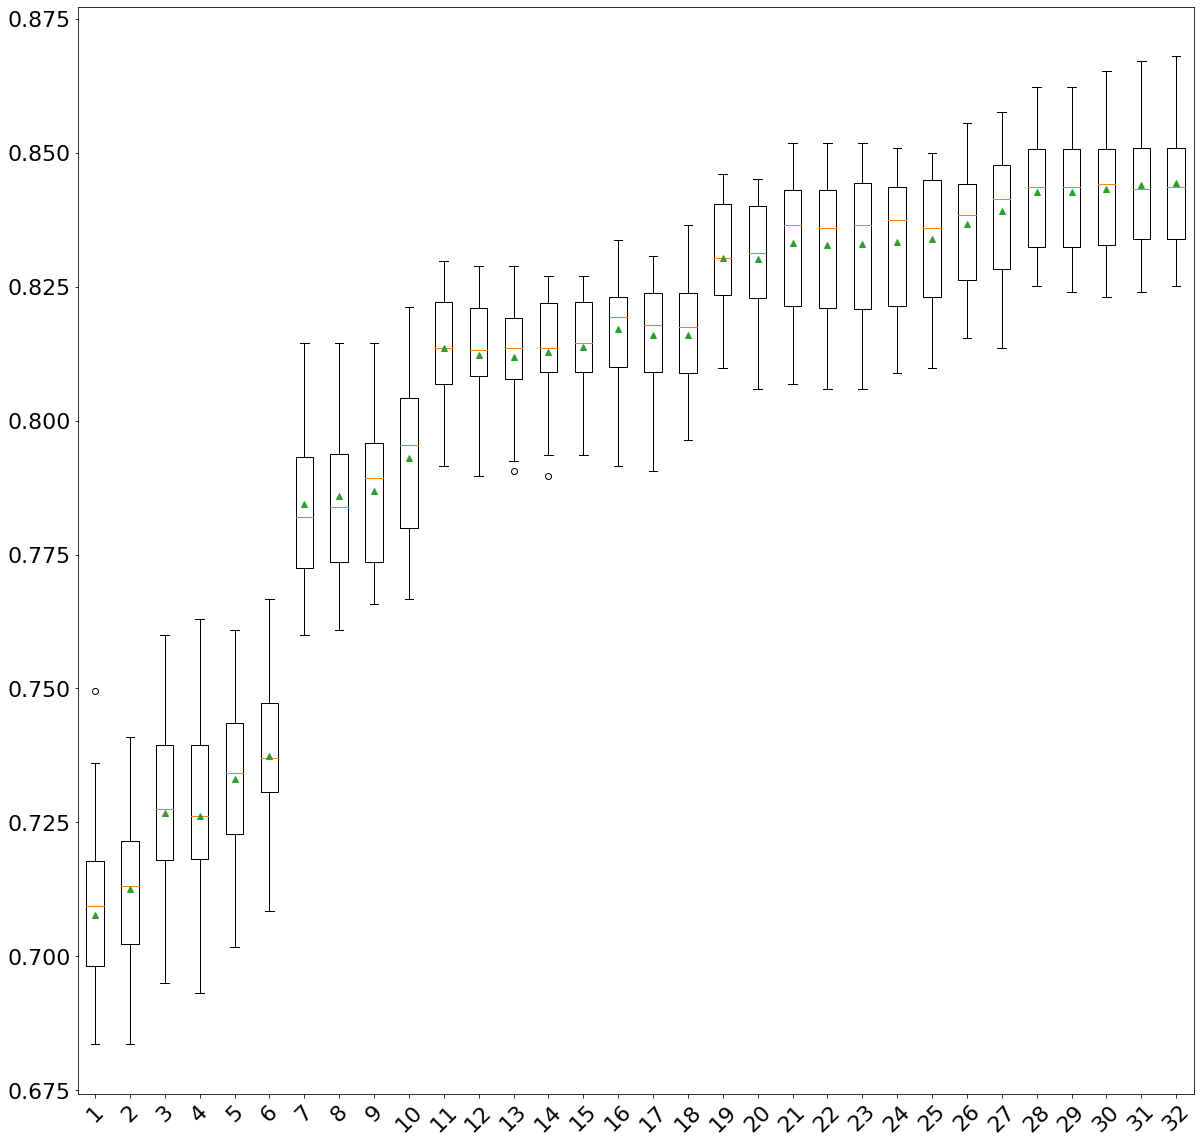

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def create_models():
    models = dict()
    for i in range (1, X_res.shape[1]+1):
        steps = [('pcs', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models


# model scores
def model_score (model, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
    

# create models
models = create_models()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = model_score(model, X_res, y_res)
    results.append(scores)
    names.append(name)
    print('model name> %s model score> %.3f model std >(%.3f)' % (name, np.mean(scores), np.std(scores)))
    
    
# plot model performance for comparison
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 22})

plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

#### from the above graph there is about 1% improvement going from 19 features to 32 so I would probably choose 19 or 21 or a number around that as a bench mark for num of features needed

### II. Based on the number of features chosen in the above step, use the test set to evaluate the model for accuracy (the code right after the plot can give you an idea about it.). Use sklearn.metrics import accuracy_score for accuracy (the google colab link in the classification module should help with it)

In [ ]:
# make predictions using pca with logistic regression

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# define the model
steps = [('pca', PCA(n_components=21)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X_res, y_res)
# make a single prediction
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.7778191291403052

### III. Show the confusion matrix and interpret the numbers in the confusion matrix (the google colab link in the classification module should help with it)


In [ ]:
from sklearn.metrics import  confusion_matrix 

conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[1875,  367],
       [ 230,  215]])

#### Confusuin Matric Interpreation :  
#### we have 1883 instances if true negative.  It means the target test was 0 and we predicted 0
#### we have 219 instances if true positive.  It means the target test was 1 and we predicted 1
#### we have 226 instamces of false negative.  It means in 226 of instaces the target test was 1 but we predicted it as 0
#### we have 369 instances if false postive.  It means the in 369 cases target test was 0 and we predicted 1
#### we can calculate precision , recall , accuracy and f1 scores with this.  Each have a formula.  ie. recall = TP/(TP+FN), precision = TP/(TP+FP), Accuracy = (TP+TN)/(TP+TN+FN+FN), F1 = 2*(precision*recall) / (precision+recall)

### IV. Show precision, recall, and f1 score ((the google colab link in the classification module should help with it)). Note that all of these scores should be calculated based on the test set and predicted result for the test set

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision score: ' , precision_score(y_test, y_pred))
print('recall score: ' , recall_score(y_test, y_pred))
print('f1 score: ' , f1_score(y_test, y_pred))

precision score:  0.3694158075601375
recall score:  0.48314606741573035
f1 score:  0.41869522882181104


### V. Plot ROC curve and find AUC (the same google colab link should help you)

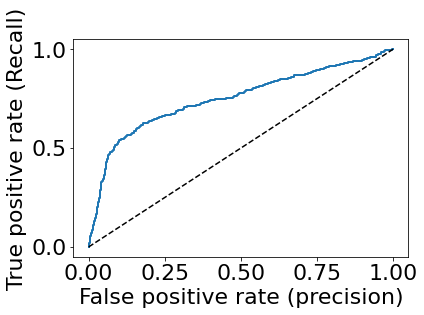

AUC Score is:  0.7502159989575921


In [ ]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(model, X_test, y_test, cv=5,  method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate (precision)")
plt.ylabel("True positive rate (Recall)")
plt.show()



from sklearn.metrics import roc_auc_score
print('AUC Score is: ', roc_auc_score(y_test, y_scores))







In [ ]:
precisions.shape 

(2683,)

In [ ]:
recalls.shape

(2683,)

In [ ]:
thresholds.shape

(601,)

### VI. Plot precision-recall curve for different thresholds and discuss the plot

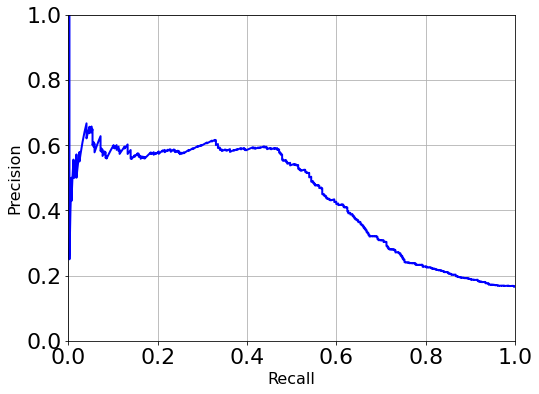

In [ ]:




def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

plt.show()

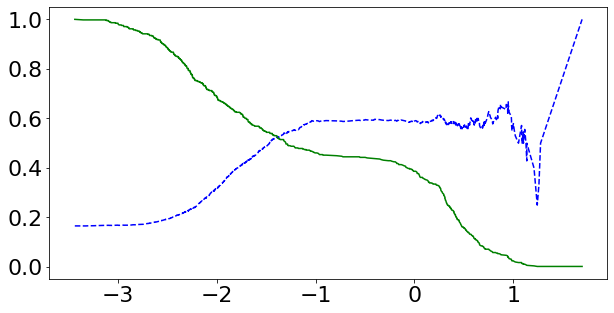

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 #[...] # highlight the threshold, add the legend, axis label and grid

plt.figure(figsize=(10,5))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
#dotted line precision, solid line recall




#### the precision curve is noisier than the recall curve. The reason is that precision may sometimes go down when you raise the threshold (although in general it will go up).  However the recall can only go down when the treashhold increaes so its curve is much smooter.  Precision really starts to fall sharply around 50% - 60% recall. So we can perhaps pick a precision/recall tradeoff just before that drop.  One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will predict around 0.5 and worst case scanario below 0.5 if the classifier is wrong most of the time. There is a tradeoff between precision and recall the higher the recall (TPR), the more false positives (FPR).

## 5. Softmaxt regression:

### I. How softmax regression is related to logistic regression? What library can you use for softmax regression?

#### Softmax Regression also known as Multinomial Logistic, Maximum Entropy Classier and Multi-class Logistic Regression) is just a generalization of logistic regression that we can use for multi-class. While logistic regressin is good for binary classificatins tasks (yes/no), (pos/neg),.. softmax regression is good for multi class.  Such as find the drug among 10 drugs, guess the article classification among 20 possible classications,.. It is importtant to note that under softmax we are assuming the multi class, classes are mutually exclusive). Softmax in that case returns to us the probablity of the instance belogining to each class and ten we can pick the highest probablity among them and assign our instance to that class.   
#### Scikit-Learn’s LogisticRegressionwe can set thehyperparameter to "multinomial" to switch it to Softmax Regression.
#### we must aso spcify a solver that supports Softmax Regression, such as the "lbfgs" solver

## 6. KNN (Always use rebalanced training set for training, if it is not specified which training set to use)

### 1. Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the unbalanced training set (the training set before rebalancing) and test it and show the confusion matrix and classification report


#### NOTE: the question said to predict based on "training set". So I did that. In case this is a typo I am also prediction based on test set in after this

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)
y_k_pred = classifier.predict(X_train)
conf_mx = confusion_matrix(y_train, y_k_pred)
conf_mx

array([[5048,  182],
       [ 676,  362]])

In [ ]:
print('precision score: ' , precision_score(y_train, y_k_pred))
print('recall score: ' , recall_score(y_train, y_k_pred))
print('f1 score: ' , f1_score(y_train, y_k_pred))

precision score:  0.6654411764705882
recall score:  0.348747591522158
f1 score:  0.45764854614412137


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_k_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      5230
         1.0       0.67      0.35      0.46      1038

    accuracy                           0.86      6268
   macro avg       0.77      0.66      0.69      6268
weighted avg       0.85      0.86      0.84      6268



#### NOTE: here is predictions based on test set  

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)
y_k_pred = classifier.predict(X_test)
conf_mx = confusion_matrix(y_test, y_k_pred)
conf_mx

array([[2150,   92],
       [ 309,  136]])

In [ ]:
print('precision score: ' , precision_score(y_test, y_k_pred))
print('recall score: ' , recall_score(y_test, y_k_pred))
print('f1 score: ' , f1_score(y_test, y_k_pred))

precision score:  0.5964912280701754
recall score:  0.3056179775280899
f1 score:  0.4041604754829123


In [ ]:
print(classification_report(y_test, y_k_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      2242
         1.0       0.60      0.31      0.40       445

    accuracy                           0.85      2687
   macro avg       0.74      0.63      0.66      2687
weighted avg       0.83      0.85      0.83      2687



### II. Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the rebalanced training set and test it and show the confusion matrix and classification report

#### NOTE: the question said to predict based on "training set". So I did that. In case this is a typo I am also prediction based on test set in after this

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_res, y_res)
y_kres_pred = classifier.predict(X_res)
conf_mx = confusion_matrix(y_res, y_kres_pred)
conf_mx

array([[4555,  675],
       [ 597, 4633]])

In [ ]:
print('precision score: ' , precision_score(y_res, y_kres_pred))
print('recall score: ' , recall_score(y_res, y_kres_pred))
print('f1 score: ' , f1_score(y_res, y_kres_pred))

precision score:  0.8728334589299171
recall score:  0.8858508604206501
f1 score:  0.8792939836781173


In [ ]:
print(classification_report(y_res, y_kres_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      5230
         1.0       0.87      0.89      0.88      5230

    accuracy                           0.88     10460
   macro avg       0.88      0.88      0.88     10460
weighted avg       0.88      0.88      0.88     10460



#### NOTE: here is predictions based on test set  

In [ ]:

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_res, y_res)
y_kres_pred = classifier.predict(X_test)
conf_mx = confusion_matrix(y_test, y_kres_pred)
conf_mx

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[1926,  316],
       [ 233,  212]])

In [ ]:
print('precision score: ' , precision_score(y_test, y_kres_pred))
print('recall score: ' , recall_score(y_test, y_kres_pred))
print('f1 score: ' , f1_score(y_test, y_kres_pred))

precision score:  0.4015151515151515
recall score:  0.4764044943820225
f1 score:  0.4357656731757451


In [ ]:
print(classification_report(y_test, y_kres_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88      2242
         1.0       0.40      0.48      0.44       445

    accuracy                           0.80      2687
   macro avg       0.65      0.67      0.66      2687
weighted avg       0.81      0.80      0.80      2687



### 3. Use grid search to tune the following hyperparameters of KNN: number of neighbors (between 1 and 20), weights  (uniform or distance), and metrics (Euclidean, Manhattan, or Minkowski)istance) to use for KNN. While creating an instance of GridSearchCV, use multiple evaluation metrics such as AUC and accuracy based on the example available at Link to sklearn (Links to an external site.). Also some helpful links and codes: https://github.com/oguzhankir/Hyperparameter_Tuning/tree/main/Knn_tuning (Links to an external site.)  and
https://www.youtube.com/watch?v=TvB_3jVIHhg

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
knn = KNeighborsClassifier()
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
search_space = {"n_neighbors": range(1,20), "weights" : ['uniform', 'distance'], "metric": ["euclidean", "manhattan", "minkowski"] }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

In [ ]:
grid_search = GridSearchCV(estimator=knn, 
             param_grid=search_space, 
             n_jobs=-1, 
             cv=cv, 
             scoring=scoring, 
             refit="AUC",
             error_score=0)
grid_results = grid_search.fit(X_res, y_res)

#best model
final_model = knn.set_params(**grid_results.best_params_)
final_model.fit(X_res, y_res)
y_pred = final_model.predict(X_test)

#summarize results
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(grid_results.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86      2242
         1.0       0.38      0.54      0.45       445

    accuracy                           0.78      2687
   macro avg       0.64      0.68      0.65      2687
weighted avg       0.81      0.78      0.79      2687

[[1850  392]
 [ 204  241]]
{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


### 4. The above grid search process can take a couple of minutes. After completing the process, print the best_params_

In [ ]:
print(grid_results.best_params_)


{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


### 5. Based on the result from grid search, use the parameters to train a model, test it with test set, and then print the confusion matrix and classification report. Also, show the AUC of ROC. 

In [ ]:
final_model = knn.set_params(**grid_results.best_params_)
final_model.fit(X_res, y_res)
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

         0.0       0.90      0.83      0.86      2242
         1.0       0.38      0.54      0.45       445

    accuracy                           0.78      2687
   macro avg       0.64      0.68      0.65      2687
weighted avg       0.81      0.78      0.79      2687

[[1850  392]
 [ 204  241]]


In [ ]:
from sklearn.metrics import roc_auc_score
print('AUC Score is: ', roc_auc_score(y_test, y_pred))

AUC Score is:  0.6833645721616934


### 6. Use PCA and based on that train model, test it and then print the confusion matrix and classification report. Also, show the AUC of ROC.

model name> 1 model score> 0.802 model std >(0.015)
model name> 2 model score> 0.832 model std >(0.014)
model name> 3 model score> 0.858 model std >(0.011)
model name> 4 model score> 0.862 model std >(0.012)
model name> 5 model score> 0.867 model std >(0.013)
model name> 6 model score> 0.871 model std >(0.012)
model name> 7 model score> 0.871 model std >(0.010)
model name> 8 model score> 0.872 model std >(0.011)
model name> 9 model score> 0.870 model std >(0.011)
model name> 10 model score> 0.871 model std >(0.012)
model name> 11 model score> 0.870 model std >(0.011)
model name> 12 model score> 0.870 model std >(0.012)
model name> 13 model score> 0.868 model std >(0.012)
model name> 14 model score> 0.869 model std >(0.012)
model name> 15 model score> 0.866 model std >(0.012)
model name> 16 model score> 0.865 model std >(0.011)
model name> 17 model score> 0.866 model std >(0.011)
model name> 18 model score> 0.865 model std >(0.011)
model name> 19 model score> 0.867 model std >(0.012)
mo

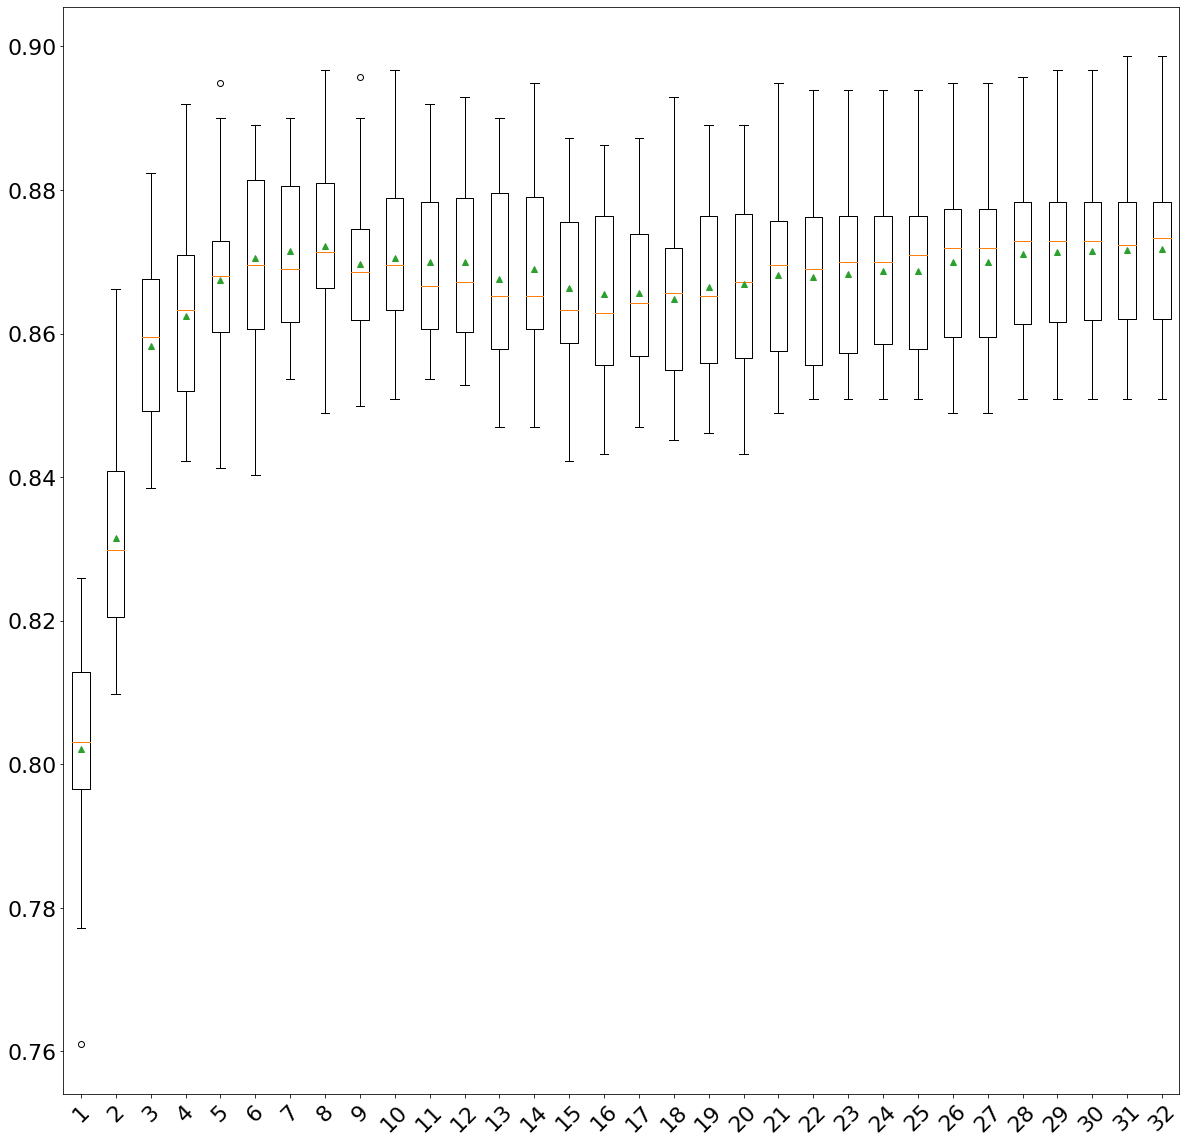

In [ ]:

def create_models2():
    models = dict()
    for i in range (1, X_res.shape[1]+1):
        steps = [('pcs', PCA(n_components=i)), ('m', KNeighborsClassifier())]
        models[str(i)] = Pipeline(steps=steps)
    return models


# model scores
def model_score2 (model, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
    

# create models
models = create_models2()

# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = model_score2(model, X_res, y_res)
    results.append(scores)
    names.append(name)
    print('model name> %s model score> %.3f model std >(%.3f)' % (name, np.mean(scores), np.std(scores)))
    
    
# plot model performance for comparison
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 22})

plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()


#### based on the above I picked 8 features as it has the highest score among my components

In [ ]:

# define the model
steps = [('pca', PCA(n_components=8)), ('m', KNeighborsClassifier())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X_res, y_res)
# make a single prediction
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('AUC Score is: ', roc_auc_score(y_test, y_pred))

0.7860066989207294
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      2242
         1.0       0.37      0.43      0.40       445

    accuracy                           0.79      2687
   macro avg       0.63      0.64      0.63      2687
weighted avg       0.80      0.79      0.79      2687

[[1922  320]
 [ 255  190]]
AUC Score is:  0.6421182932574246


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### 7. A short discussion on the 4 models and their differences.

#### the model on unbalanced data was the worst .  The best AUC I got was from using logistic regression with piplining PCA it put my AUC at over 75%.  The KNN poerformed much better with balanced data f1 score was close to 90% for tru positives, accuracy close to 80 using the PCA and pipline helped my results

## 7. Naive Bayes

### 1. Train a model with GaussianNB, test it and then print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb_pred = gnb.predict(X_test)
conf_mx = confusion_matrix(y_test, y_gnb_pred)
print(conf_mx)
print('precision score: ' , precision_score(y_test, y_gnb_pred))
print('\nrecall score: ' , recall_score(y_test, y_gnb_pred))
print('\nf1 score: ' , f1_score(y_test, y_gnb_pred))
print('\n', classification_report(y_test, y_gnb_pred))



[[1835  407]
 [ 174  271]]
precision score:  0.3997050147492625

recall score:  0.6089887640449438

f1 score:  0.4826357969723954

               precision    recall  f1-score   support

         0.0       0.91      0.82      0.86      2242
         1.0       0.40      0.61      0.48       445

    accuracy                           0.78      2687
   macro avg       0.66      0.71      0.67      2687
weighted avg       0.83      0.78      0.80      2687



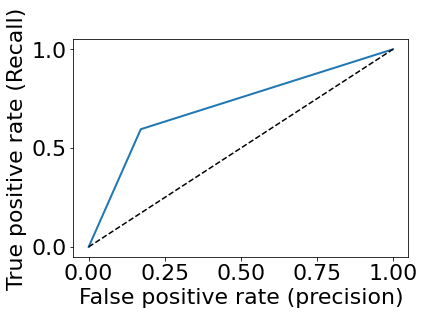

AUC Score is:  0.7137272098547646


In [ ]:


from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(gnb, X_test, y_test, cv=5)

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate (precision)")
plt.ylabel("True positive rate (Recall)")
plt.show()


print('AUC Score is: ', roc_auc_score(y_test, y_gnb_pred))




#### number of miss classificatin is FP+FN 

In [ ]:
Miss = conf_mx[0,1]+conf_mx[1,0]
print ('number of miss classificatin is FP+FN: ', Miss)
print(  (y_test != y_gnb_pred).sum())


number of miss classificatin is FP+FN:  581
581


### II. Train a model with CategoricalNB, test it and then print the confusion matrix and classification report. Also, plot ROC curve, and show the AUC of ROC and the count of the number of misclassification.

[[2109  133]
 [ 253  192]]
precision score:  0.5907692307692308

recall score:  0.4314606741573034

f1 score:  0.4987012987012987

               precision    recall  f1-score   support

         0.0       0.89      0.94      0.92      2242
         1.0       0.59      0.43      0.50       445

    accuracy                           0.86      2687
   macro avg       0.74      0.69      0.71      2687
weighted avg       0.84      0.86      0.85      2687



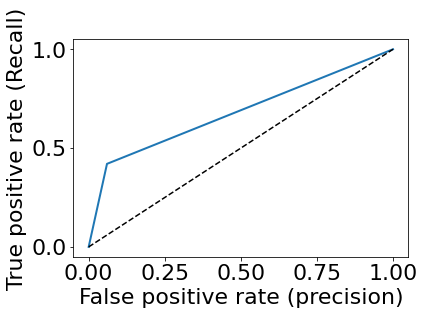

AUC Score is:  0.6860693201294992
number of miss classificatin is FP+FN:  386
386


In [ ]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
y_cnb_pred = cnb.predict(X_test)
conf_mx = confusion_matrix(y_test, y_cnb_pred)
print(conf_mx)
print('precision score: ' , precision_score(y_test,y_cnb_pred))
print('\nrecall score: ' , recall_score(y_test, y_cnb_pred))
print('\nf1 score: ' , f1_score(y_test, y_cnb_pred))
print('\n', classification_report(y_test, y_cnb_pred))







from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(cnb, X_test, y_test, cv=5)

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate (precision)")
plt.ylabel("True positive rate (Recall)")
plt.show()


print('AUC Score is: ', roc_auc_score(y_test, y_cnb_pred))








Miss = conf_mx[0,1]+conf_mx[1,0]
print ('number of miss classificatin is FP+FN: ', Miss)
print(  (y_test != y_cnb_pred).sum())

## 8. Support Vector Machine 

### I. Build a support vector machine model using SVC. Use grid search to tune some parameters and then based on that show the best parameters found

In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,], 'kernel': ['rbf', 'sigmoid', 'poly']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3, n_jobs = -1)

grid.fit(X_res,y_res)

grid.best_params_


Fitting 5 folds for each of 36 candidates, totalling 180 fits


### II. Test the model and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

In [ ]:
l = grid.best_params_

final_model = SVC(C = 1, gamma = 1, kernel= 'rbf')
final_model.fit(X_res, y_res)
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
print('AUC Score is: ', roc_auc_score(y_test, y_pred))

In [ ]:
print('precision score: ' , precision_score(y_test,y_pred))
print('\nrecall score: ' , recall_score(y_test, y_pred))
print('\nf1 score: ' , f1_score(y_test, y_pred))
print('\n', classification_report(y_test,y_pred))
conf_mx = confusion_matrix(y_test, y_pred)


precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate (precision)")
plt.ylabel("True positive rate (Recall)")
plt.show()

print('AUC Score is: ', roc_auc_score(y_test, y_pred))

Miss = conf_mx[0,1]+conf_mx[1,0]
print ('number of miss classificatin is FP+FN: ', Miss)
print(  (y_test != y_pred).sum())


## 9. Decision Tree

### I. Build a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set, entropy as the criterion. Try with different max_depth (or use grid search). After building model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification. Show the decision tree. (you can simply import tree from sklearn and call tree.plot_tree with your model and the call plt.show. At the beginning of this process, use plt.figure to change the figsize)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'criterion': ['entropy'], 'max_depth': range(1,20)}

grid = GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True, n_jobs=-1, verbose=3)

grid_results = grid.fit(X_train, y_train)

l = grid_results.best_estimator_


print(l)


In [ ]:
final_model = DecisionTreeClassifier.set_params(l)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('AUC Score is: ', roc_auc_score(y_test, y_pred))

In [ ]:
print('precision score: ' , precision_score(y_test,y_pred))
print('\nrecall score: ' , recall_score(y_test, y_pred
                                       ))
print('\nf1 score: ' , f1_score(y_test, y_pred))
print('\n', classification_report(y_test,y_pred))
conf_mx = confusion_matrix(y_test, y_pred)


precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate (precision)")
plt.ylabel("True positive rate (Recall)")
plt.show()

print('AUC Score is: ', roc_auc_score(y_test, y_pred))

Miss = conf_mx[0,1]+conf_mx[1,0]
print ('number of miss classificatin is FP+FN: ', Miss)
print(  (y_test != y_pred).sum())

In [ ]:
import sklearn.tree as tree

In [ ]:
plt.figure(figsize = (20,20))
tree.plot_tree(final_model)
plt.show()

### II. Perform the same tasks as 9.1 with the balanced training set

In [ ]:
final_model.fit(X_res, y_res)
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('AUC Score is: ', roc_auc_score(y_test, y_pred))
print('precision score: ' , precision_score(y_test,y_pred))
print('\nrecall score: ' , recall_score(y_test, y_pred
                                       ))
print('\nf1 score: ' , f1_score(y_test, y_pred))
print('\n', classification_report(y_test,y_pred))



In [ ]:
conf_mx = confusion_matrix(y_test, y_pred)


precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate (precision)")
plt.ylabel("True positive rate (Recall)")
plt.show()

print('AUC Score is: ', roc_auc_score(y_test, y_pred))

Miss = conf_mx[0,1]+conf_mx[1,0]
print ('number of miss classificatin is FP+FN: ', Miss)
print(  (y_test != y_pred).sum())

In [ ]:
plt.figure(figsize = (20,20))
tree.plot_tree(final_model)
plt.show()

### III. Discuss any difference and also discuss part of the tree of 9.2

#### the balanced data gave us a more accuare prediction.  Better distrbution of tree.  So first brand breaks the three into two.  The left hand side results in a huge drop in entropy which is good.  entropy drops to 0.53 here. where as the right handside has 0.93 which is not that good.  on the right hand side again the entropy is dropped to 0.261 and finally to 0.102 very low number.  We can see in the leaf unit how only 20 values out of 1504 belong to Yes and the rest are no.  This shows this branch has been able to predict our yeses and nos very efficiently.  Compared to left leaf of same parent.  Entropy is 0.478.  looking at the 4th leaf from left entroy is 0.977 this is a bad split.  Entropy is close to one, our guesses are almost completely randome.  we can see number of yes and nos are equal

## 10. Random Forest

### 1. Use grid search to tune the max_depth, min_samples_leaf, and n_estimators  (helpful link:https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/) [it may take about 5 minutes

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [5,10,20],
    'n_estimators': [10,50,100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_results = grid_search.fit(X_train, y_train)

l = grid_results.best_estimator_
print (l)

### 2. Print the best estimator

In [ ]:
print(grid_search.best_estimator_)

### 3. Train the model. After building the model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

In [ ]:
final_model = RandomForestClassifier.set_params(l)
final_model.fit(X_res, y_res)
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('AUC Score is: ', roc_auc_score(y_test, y_pred))
print('precision score: ' , precision_score(y_test,y_pred))
print('\nrecall score: ' , recall_score(y_test, y_pred))
print('\nf1 score: ' , f1_score(y_test, y_pred))
print('\n', classification_report(y_test,y_pred))


In [ ]:
conf_mx = confusion_matrix(y_test, y_pred)


precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate (precision)")
plt.ylabel("True positive rate (Recall)")
plt.show()

print('AUC Score is: ', roc_auc_score(y_test, y_pred))

Miss = conf_mx[0,1]+conf_mx[1,0]
print ('number of miss classificatin is FP+FN: ', Miss)
print(  (y_test != y_pred).sum())

## 11. Boosting Algorithms 

### 1. Train an AdaBoostClassifier model with some manual/grid search-based parameters and then test it and then print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

In [ ]:

from sklearn.ensemble import AdaBoostClassifier

In [ ]:
estimator = [10, 50, 100, 200]
learningRate = [ 0.1, 1, 10]
score = []
dt = DecisionTreeClassifier()
for i in estimator:
    for j in learningRate:
        clf = AdaBoostClassifier(n_estimators=i, base_estimator=dt,learning_rate=j)
        clf.fit(X_res,y_res)
        y_pred = clf.predict(X_test)
        x = accuracy_score(y_test, y_pred)
        score.append(x)

print(score)




## took too long for grid search to run so I just mannucally printerd some scores above to decides

##param_grid = {'n_estimators': [10, 50, 100, 200], 'learning_rat': [ 0.1, 1, 10]}

##grid = GridSearchCV(AdaBoostClassifier(), base_estimator = dt, param_grid,refit=True, n_jobs=-1)

##grid_results = grid.fit(X_res, y_res)

##l = grid_results.best_estimator_

##final_model = AdaBoostClassifier.set_params(**grid.best_params_)

final_model = AdaBoostClassifier(n_estimators=50, base_estimator=dt,learning_rate=10)

final_model.fit(X_res, y_res)
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('AUC Score is: ', roc_auc_score(y_test, y_pred))


print('precision score: ' , precision_score(y_test,y_pred))
print('\nrecall score: ' , recall_score(y_test, y_pred
                                       ))
print('\nf1 score: ' , f1_score(y_test, y_pred))
print('\n', classification_report(y_test,y_pred))
conf_mx = confusion_matrix(y_test, y_pred)


precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate (precision)")
plt.ylabel("True positive rate (Recall)")
plt.show()

print('AUC Score is: ', roc_auc_score(y_test, y_pred))

Miss = conf_mx[0,1]+conf_mx[1,0]
print ('number of miss classificatin is FP+FN: ', Miss)
print(  (y_test != y_pred).sum())



### 2. Do the same for Gradient BoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)


In [ ]:

estimator = [10, 50, 100]
learningRate = [ 0.1, 1]
depth = [1,5,10]
score = []
dt = DecisionTreeClassifier()
for i in estimator:
    for j in learningRate:
        for z in depth:
            clf = GradientBoostingClassifier(n_estimators=i,max_depth = z,learning_rate=j)
            clf.fit(X_res,y_res)
            y_pred = clf.predict(X_test)
            x = accuracy_score(y_test, y_pred)
            score.append(x)

print(score)






## took too long code for grid search ri eyb

##param_grid = {'n_estimators': [10, 50, 100, 200], 'learning_rat': [ 0.1, 1, 10]}

##grid = GridSearchCV(GradientBoostingClassifier(), base_estimator = dt, param_grid,refit=True, n_jobs=-1)

##grid_results = grid.fit(X_res, y_res)

##l = grid_results.best_estimator_

##final_model = GradientBoostingClassifier.set_params(**grid.best_params_)

final_model = GradientBoostingClassifier(n_estimators=100,max_depth = 10,learning_rate=0.1)

final_model.fit(X_res, y_res)
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('AUC Score is: ', roc_auc_score(y_test, y_pred))


print('precision score: ' , precision_score(y_test,y_pred))
print('\nrecall score: ' , recall_score(y_test, y_pred
                                       ))
print('\nf1 score: ' , f1_score(y_test, y_pred))
print('\n', classification_report(y_test,y_pred))
conf_mx = confusion_matrix(y_test, y_pred)


precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate (precision)")
plt.ylabel("True positive rate (Recall)")
plt.show()

print('AUC Score is: ', roc_auc_score(y_test, y_pred))

Miss = conf_mx[0,1]+conf_mx[1,0]
print ('number of miss classificatin is FP+FN: ', Miss)
print(  (y_test != y_pred).sum())









## 12. Finally, briefly discuss your finding such as which model could be most suitable for this given scenario and what could be your future work based on this experiment.

#### I think logistic regression with PCA pipelining gave me the highest AUC so I would perhaps use that followed by random forest.  The balanced data certainly seemed to help in some classifers such as KNN.  Hyper paramet tuning with grid search was great.  I would like to test with more grid search.  I had to pick small numbers since after hours of coputation my gris searches were still running. Ada boost had really high misses compared to GradientBoostingClassifier .  Random forest gave me some of the highest AUC.  It was obviouse that there was not much difference between the balance data and imbalance ones in Random forest and tree algos.  This was expected as these two algos do not make assumptions about the data and do need scaled data.  GaussianNB gave me better results comapred with CategoricalNB but only by a slight margin.  I think my future work would need to involve more feature selection and grid search.  I would like to experiment more with SVM.  It gave me a 0.66 AUC but the grid search could have been more complete so I would like to try different params.  In general I could not get the test prediction to go over 70 some percent so I would probbaly like more training data to train the models better.  Probably gather more features that could contribute more strongly towards my model predictions

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc